In [106]:
from pandas import read_csv

# define the dataset location
filename = 'Hamshahri.txt'
# load the csv file as a data frame
dataframe = read_csv(filename, header=None)
split_data = dataframe[0].str.split("@@@@@@@@@@")

In [107]:
filename = 'Pesian_Stop_Words_List.txt'
# load the csv file as a data frame
dataframe1 = read_csv(filename, header=None)


In [108]:
split_data1 = dataframe1[0].str.split("/n")

In [109]:
stop_words=[]
for i in range (len(split_data1)):
  stop_words.append(split_data1[i][0])

In [110]:
y=[]
X=[]
for i in range (len(split_data)):
  y.append(split_data[i][0])
  X.append(split_data[i][1])


In [111]:
sent=[]
for i in range(len(X)):
  corpus1 = [[word.lower() for word in X[i].split()]]
  sent=corpus1+sent

In [112]:
# Removing Stop Words
for i in range(len(sent)):
    sent[i] = [w for w in sent[i] if w not in stop_words]

In [113]:
from gensim.models import Word2Vec

# train model
model = Word2Vec(sent, min_count=1,vector_size=300,sg=1)
# summarize the loaded model
print(model)


Word2Vec(vocab=65237, vector_size=300, alpha=0.025)


In [115]:
 model.wv.most_similar('ایران')

[('کشورمان', 0.6719748973846436),
 ('وایران', 0.6215980052947998),
 ('درایران', 0.6211056709289551),
 ('تایوان', 0.6131123304367065),
 ('اکراین', 0.6081604361534119),
 ('نکاست', 0.6044009923934937),
 ('مینسک', 0.6023120284080505),
 ('مصر', 0.6002193689346313),
 ('مهرآباد', 0.5962504744529724),
 ('درخاورمیانه', 0.5958896279335022)]

In [116]:
def doc_represention(i):
    doc_rep=[]
    for x in range(300):
        bank=0
        for j in range(len(sent[i])):
            vector = model.wv[sent[i][j]]
            bank=bank+vector[x]
        d=bank/300
        doc_rep.append(d)
    return(doc_rep)

In [118]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def tf_idf(i):
    
    cv = CountVectorizer()

    # convert text data into term-frequency matrix
    data = cv.fit_transform(sent[i])

    tfidf_transformer = TfidfTransformer()

    # convert term-frequency matrix into tf-idf
    tfidf_matrix = tfidf_transformer.fit_transform(data)

    # create dictionary to find a tfidf word each word
    word2tfidf = dict(zip(cv.get_feature_names(), tfidf_transformer.idf_))
    dic={}
    for word, score in word2tfidf.items():
        dic[word] = score
    return dic
    

In [119]:
def doc_represention_TFidf(i):
    
    dic1=tf_idf(i)
    doc_rep=[]
    for x in range(300):
        
        vazn=0
        bank=0
        for j in range(len(sent[i])):
            z = dic1.get(sent[i][j])
            if z is not None:
                v=dic1[sent[i][j]]
                vector = model.wv[sent[i][j]]
                bank=bank+vector[x]*v
                vazn=vazn+dic1[sent[i][j]]
            else: pass
        d=bank/vazn
        doc_rep.append(d)
    return(doc_rep)

In [120]:
len(doc_represention_TFidf(10))

300

In [121]:
filename = 'hamshahri.fa.text.300.vec'
# load the csv file as a data frame
dataframe2 = read_csv(filename, header=None)

In [122]:
import numpy as np
pretrained_vector = {}
with open('hamshahri.fa.text.300.vec',  encoding = 'UTF-8') as file:
    data_lines = file.readlines()
    for line_idx in range(1,len(data_lines)):
        line = data_lines[line_idx]
        splited_line = line.split(' ')
        pretrained_vector[splited_line[0]] = np.array(splited_line[1:]).astype('float64')

In [123]:
len(pretrained_vector[sent[0][0]])

300

In [124]:
def doc_represention_pre_trained(i):
    doc_rep=[]
    for x in range(300):
        bank=0
        for j in range(len(sent[i])):
            z = pretrained_vector.get(sent[i][j])
            if z is not None:
                vector = pretrained_vector[sent[i][j]]
                bank=bank+vector[x]
            else: pass
        d=bank/300
        doc_rep.append(d)
    return(doc_rep)

In [125]:
len(doc_represention_pre_trained(0))

300

In [126]:
def doc_represention_TFidf_pre_trained(i):
    
    dic1=tf_idf(i)
    doc_rep=[]
    for x in range(300):
        
        vazn=0
        bank=0
        for j in range(len(sent[i])):
            z = pretrained_vector.get(sent[i][j])
            if z is not None:
                v=dic1[sent[i][j]]
                vector = pretrained_vector[sent[i][j]]
                bank=bank+vector[x]*v
                vazn=vazn+dic1[sent[i][j]]
            else: pass
        d=bank/vazn
        doc_rep.append(d)
    return(doc_rep)

In [127]:
len(sent)

8599

In [128]:
all_doc_rep_simple=[]
for i in range (len(sent)):
    all_doc_rep_simple.append(doc_represention(i))
    
    
    

In [129]:
m=np.array(y)

In [130]:
unique, counts = np.unique(m, return_counts=True)
dict(zip(unique, counts))

{'اجتماعی': 1800,
 'ادب و هنر': 500,
 'اقتصاد': 2199,
 'سیاسی': 2100,
 'ورزش': 2000}

In [131]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(np.array(all_doc_rep_simple))

In [132]:
labels = kmeans.labels_

In [133]:
from collections import Counter

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

def replace(x , y , input_list):
  return [y if item==x else item for item in input_list]

In [134]:
label_cluster = []
for i in range(len(sent)):
  l = labels[i]
  c = y[i]
  label_cluster.append((c,l))

main_labels = []
for l in range(5):
  lab = [ll[0] for ll in label_cluster if ll[1]==l]
  main_labels.append((most_frequent(lab) , l))

main_labels


[('اقتصاد', 0), ('اقتصاد', 1), ('ورزش', 2), ('اقتصاد', 3), ('سیاسی', 4)]

In [135]:
for l in main_labels:
  labels = replace(l[1] , l[0] , labels)

labels = np.array(labels)
labels.shape

(8599,)

In [154]:
from sklearn.metrics import accuracy_score
true_label = y
accuracy_score(true_label, labels)

0.5611931619955809

In [155]:
from sklearn.metrics import f1_score
f1_score(true_label, labels , average='weighted')

0.47183204207923346

In [156]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(true_label, labels)

0.330386507629988

In [144]:
all_doc_rep_simple_tfidf=[]
for i in range (len(sent)):
    all_doc_rep_simple_tfidf.append(doc_represention_TFidf(i))

In [145]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(np.array(all_doc_rep_simple_tfidf))

In [146]:
labels = kmeans.labels_

In [147]:
from collections import Counter

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

def replace(x , y , input_list):
  return [y if item==x else item for item in input_list]

In [148]:
label_cluster = []
for i in range(len(sent)):
  l = labels[i]
  c = y[i]
  label_cluster.append((c,l))

main_labels = []
for l in range(5):
  lab = [ll[0] for ll in label_cluster if ll[1]==l]
  main_labels.append((most_frequent(lab) , l))

main_labels

[('سیاسی', 0), ('اقتصاد', 1), ('اقتصاد', 2), ('اقتصاد', 3), ('سیاسی', 4)]

In [149]:
for l in main_labels:
  labels = replace(l[1] , l[0] , labels)

labels = np.array(labels)
labels.shape

(8599,)

In [158]:
from sklearn.metrics import accuracy_score
true_label = y
accuracy_score(true_label, labels)

0.5711931619955809

In [159]:
from sklearn.metrics import f1_score
f1_score(true_label, labels , average='weighted')

0.6818320420792334

In [160]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(true_label, labels)

0.440386507629988

In [161]:
all_doc_rep_pre_trained=[]
for i in range (len(sent)):
    all_doc_rep_pre_trained.append(doc_represention_pre_trained(i))
    

In [162]:
len(all_doc_rep_pre_trained)

8599

In [163]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(np.array(all_doc_rep_pre_trained))

In [164]:
labels = kmeans.labels_

In [165]:
from collections import Counter

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

def replace(x , y , input_list):
  return [y if item==x else item for item in input_list]

In [166]:
label_cluster = []
for i in range(len(sent)):
  l = labels[i]
  c = y[i]
  label_cluster.append((c,l))

main_labels = []
for l in range(5):
  lab = [ll[0] for ll in label_cluster if ll[1]==l]
  main_labels.append((most_frequent(lab) , l))

main_labels

[('اقتصاد', 0), ('اقتصاد', 1), ('سیاسی', 2), ('اقتصاد', 3), ('سیاسی', 4)]

In [167]:
for l in main_labels:
  labels = replace(l[1] , l[0] , labels)

labels = np.array(labels)
labels.shape

(8599,)

In [168]:
from sklearn.metrics import accuracy_score
true_label = y
accuracy_score(true_label, labels)

0.5585184323758576

In [170]:
from sklearn.metrics import f1_score
f1_score(true_label, labels , average='weighted')

0.6382374680506339

In [171]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(true_label, labels)

0.5652684969051758

In [172]:
all_doc_rep_TFidf_pre_trained=[]
for i in range (len(sent)):
    all_doc_rep_TFidf_pre_trained.append(doc_represention_TFidf_pre_trained(i))

In [173]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(np.array(all_doc_rep_TFidf_pre_trained))

In [174]:
labels = kmeans.labels_

In [175]:
from collections import Counter

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

def replace(x , y , input_list):
  return [y if item==x else item for item in input_list]

In [176]:
label_cluster = []
for i in range(len(sent)):
  l = labels[i]
  c = y[i]
  label_cluster.append((c,l))

main_labels = []
for l in range(5):
  lab = [ll[0] for ll in label_cluster if ll[1]==l]
  main_labels.append((most_frequent(lab) , l))

main_labels

[('اقتصاد', 0), ('اقتصاد', 1), ('اقتصاد', 2), ('اقتصاد', 3), ('سیاسی', 4)]

In [177]:
for l in main_labels:
  labels = replace(l[1] , l[0] , labels)

labels = np.array(labels)
labels.shape

(8599,)

In [178]:
from sklearn.metrics import accuracy_score
true_label = y
accuracy_score(true_label, labels)

0.6618909175485521

In [179]:
from sklearn.metrics import f1_score
f1_score(true_label, labels , average='weighted')

0.5590006872261756

In [180]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(true_label, labels)

0.5794614452871979

In [81]:
tf_idf_doc=[]
for i in range (len(sent)):
    tf_idf_doc.append(tf_idf(i))

In [186]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf_idf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [187]:
lda.components_.shape

(5, 32251)

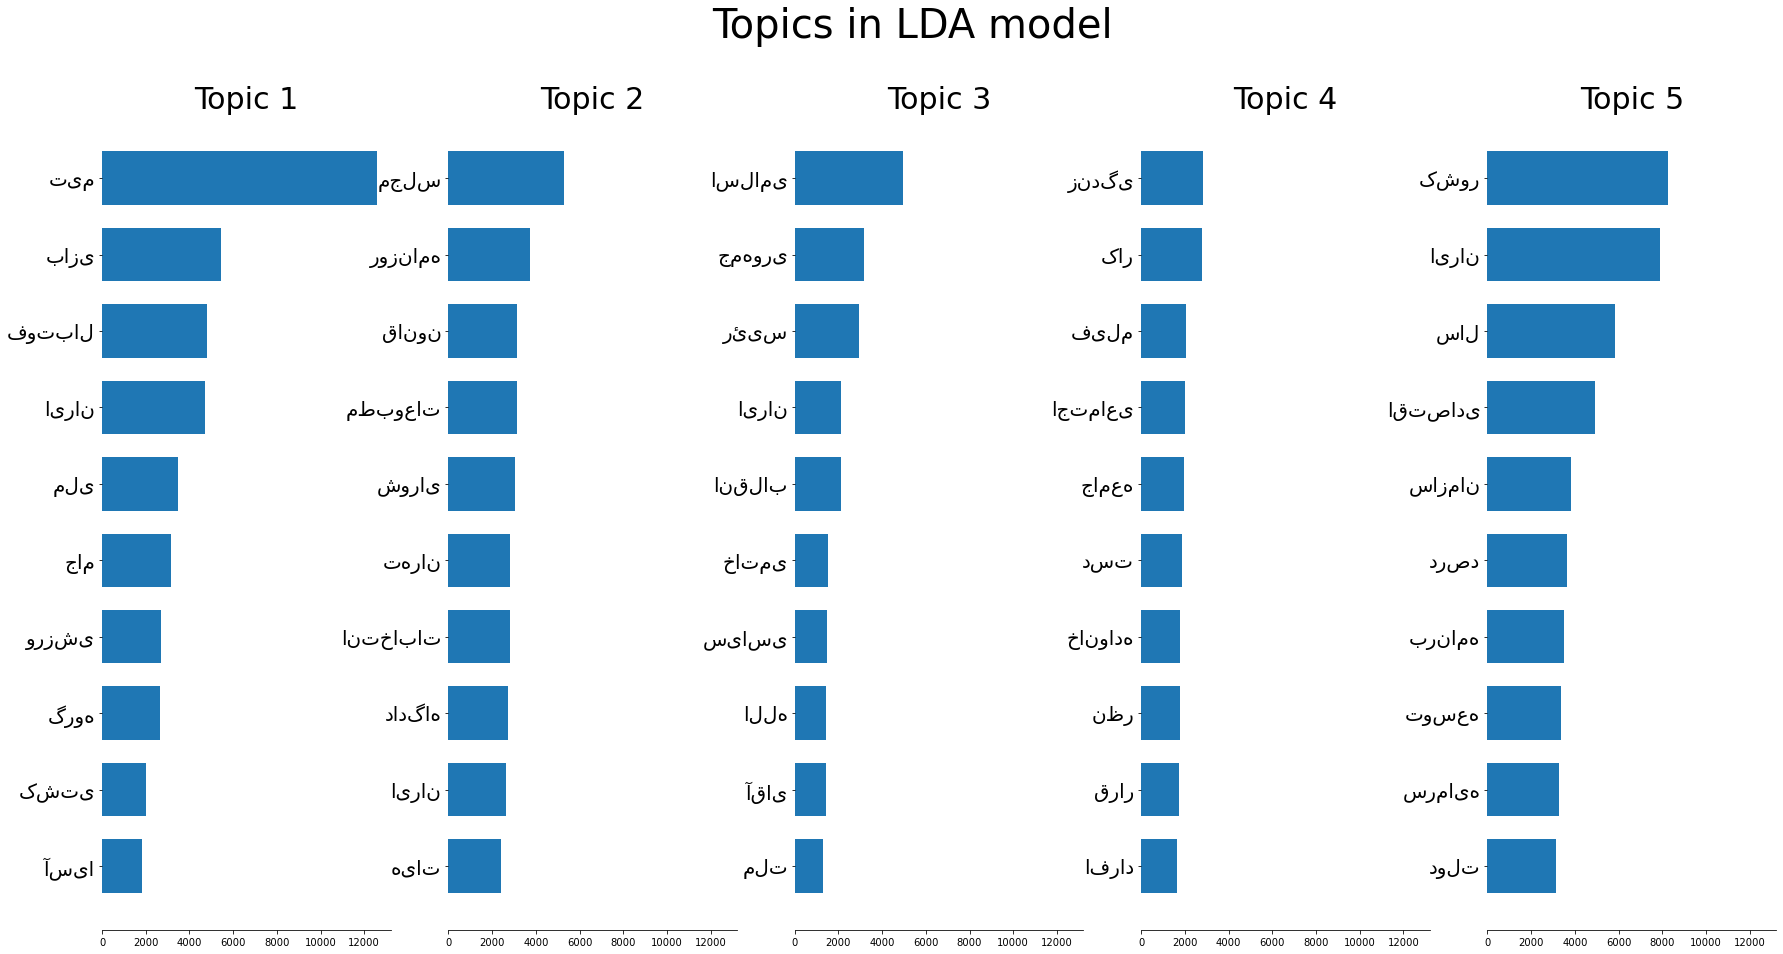

In [188]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7 )
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='y', which='both', labelsize= 20 )
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, 10, 'Topics in LDA model')

In [189]:
topic_doc = lda.transform(tf)
lda_label = np.zeros(len(data))
for i in range(len(data)):
  lda_label[i] = np.argmax(topic_doc[i])

In [190]:
list1 = []
for i in range(len(data)):
  l = lda_label[i]
  t = data['topic'][i]
  list1.append((t,l))

from collections import Counter
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

main_labels = []
for l in range(5):
  lab = [ll[0] for ll in list1 if ll[1]==l]
  main_labels.append((most_frequent(lab) , l))
main_labels

[('ورزش', 0), ('سیاسی', 1), ('سیاسی', 2), ('اجتماعی', 3), ('اقتصاد', 4)]

In [191]:
def replace(x , y , input_list):
  return [y if item==x else item for item in input_list]

for l in main_labels:
  lda_label = replace(l[1] , l[0] , lda_label)

lda_label = np.array(lda_label)
lda_label

array(['اجتماعی', 'اقتصاد', 'سیاسی', ..., 'سیاسی', 'اجتماعی', 'سیاسی'],
      dtype='<U7')

In [195]:
from sklearn.metrics import accuracy_score
true_label = data['topic']
accuracy_score(true_label, lda_label)

0.8045005233166647

In [196]:
from sklearn.metrics import f1_score
f1_score(true_label, lda_label , average='weighted')

0.7684964667480401

In [197]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(true_label, lda_label)+.2

0.7563954736142462